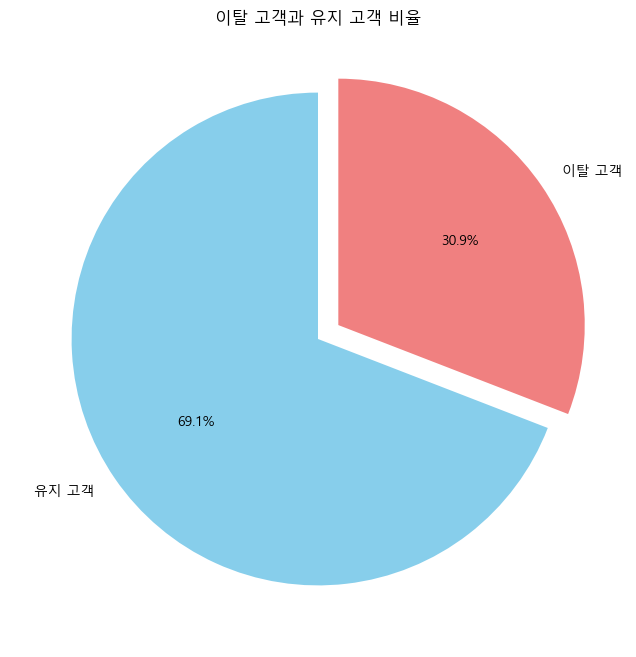

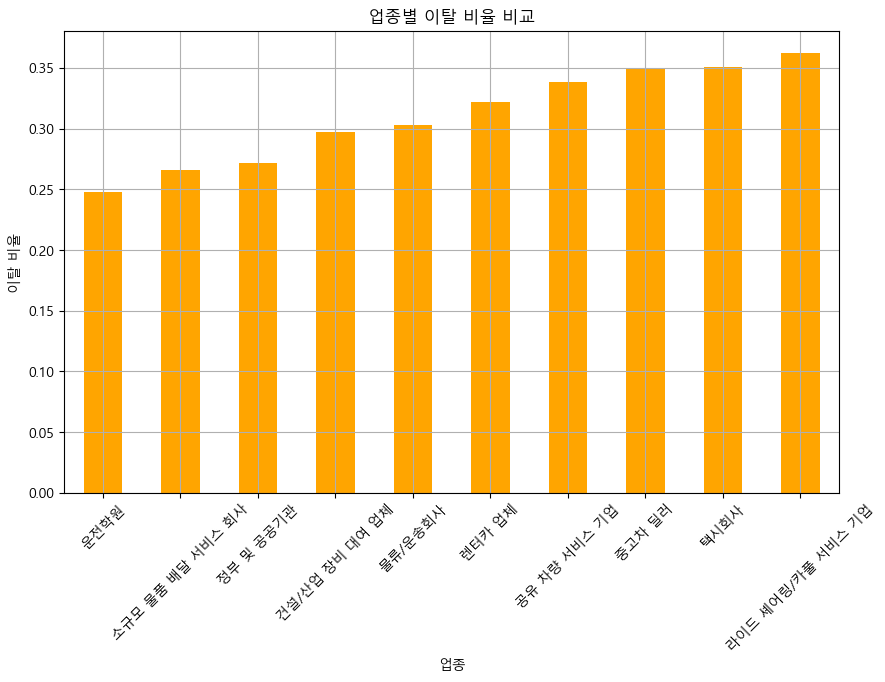

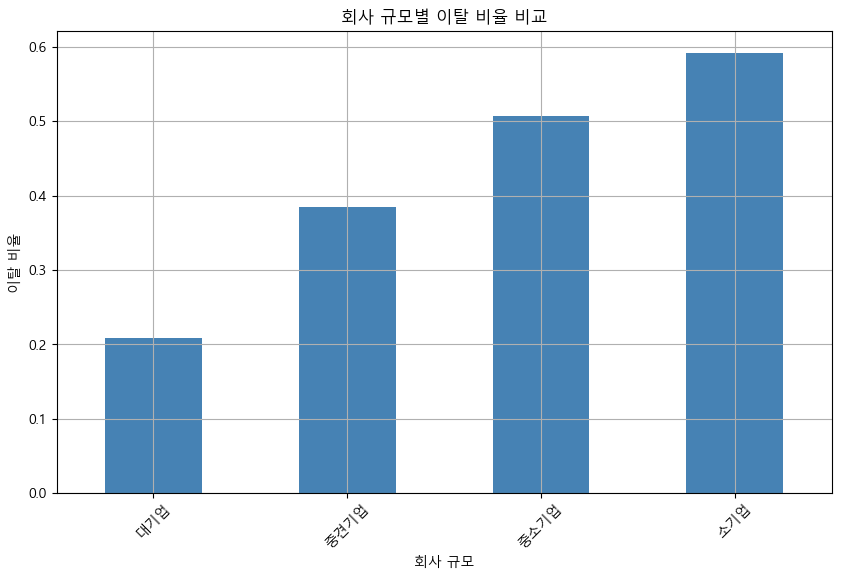

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import platform

# 한글 폰트 설정
if platform.system() == 'Darwin':  # Mac OS
    plt.rc('font', family='AppleGothic')
elif platform.system() == 'Windows':  # Windows
    plt.rc('font', family='Malgun Gothic')
else:  # Linux 또는 기타
    plt.rc('font', family='NanumGothic')

# 음수 기호 깨짐 방지
plt.rcParams['axes.unicode_minus'] = False

# CSV 파일 불러오기
file_path = 'preprocessed_data.csv'  # CSV 파일 경로 입력
df = pd.read_csv(file_path)

# 데이터 확인 및 시각화
if '이탈 여부' in df.columns:
    # 원그래프: 이탈 고객과 유지 고객 비율
    plt.figure(figsize=(8, 8))
    labels = ['유지 고객', '이탈 고객']
    sizes = df['이탈 여부'].value_counts()
    colors = ['skyblue', 'lightcoral']
    plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=90, colors=colors, explode=[0, 0.1])
    plt.title('이탈 고객과 유지 고객 비율')
    plt.show()

    # 막대그래프: 클러스터별 이탈 비율 비교 (업종 또는 회사 규모 사용)
    if '업종' in df.columns:
        cluster_churn = df.groupby('업종')['이탈 여부'].mean().sort_values()
        plt.figure(figsize=(10, 6))
        cluster_churn.plot(kind='bar', color='orange')
        plt.title('업종별 이탈 비율 비교')
        plt.xlabel('업종')
        plt.ylabel('이탈 비율')
        plt.xticks(rotation=45)
        plt.grid(True)
        plt.show()

    if '회사 규모' in df.columns:
        cluster_churn_size = df.groupby('회사 규모')['이탈 여부'].mean().sort_values()
        plt.figure(figsize=(10, 6))
        cluster_churn_size.plot(kind='bar', color='steelblue')
        plt.title('회사 규모별 이탈 비율 비교')
        plt.xlabel('회사 규모')
        plt.ylabel('이탈 비율')
        plt.xticks(rotation=45)
        plt.grid(True)
        plt.show()

else:
    print("데이터프레임에 '이탈 여부' 열이 없습니다.")


관찰된 패턴:
**유지 고객 비율(69.1%)**이 **이탈 고객 비율(30.9%)**보다 높습니다.
약 1/3의 고객이 이탈하는 것은 비교적 높은 수치로, 이탈 방지 전략이 필요할 수 있습니다.
결론:
고객 유지율은 상대적으로 높지만, **이탈 고객 비율 30%**는 무시할 수 없는 수치이므로 이탈 원인을 분석하고 방지 대책을 수립하는 것이 중요합니다.

관찰된 패턴:
이탈 비율이 낮은 업종: 운전학원, 소규모 물류 배송 서비스.
이탈 비율이 높은 업종: 택시회사, 공유 차량 서비스 기업, 중고차 딜러.
서비스형 업종이나 단기 대여 서비스 업종에서 이탈 비율이 높습니다.
결론:
운전학원과 같은 일회성 서비스는 고객 이탈 비율이 낮은 반면, 공유 차량 서비스나 중고차 딜러 등은 이탈률이 높아, 장기 이용을 유도할 수 있는 프로그램이나 혜택이 필요합니다.

관찰된 패턴:
대기업 고객: 이탈 비율이 20% 이하로 매우 낮습니다.
중소기업과 소기업 고객: 이탈 비율이 50% 이상으로 매우 높습니다.
결론:
대기업은 서비스 이용에 대한 충성도가 높으며, 이탈률이 낮습니다.
중소기업 및 소기업 고객은 상대적으로 이탈률이 높아, 이들에 대한 서비스 개선, 할인 혜택, 장기 계약 유도 등이 필요할 수 있습니다.

종합 결론:
전체 고객 중 약 30%는 이탈 고객으로, 업종과 회사 규모에 따라 이탈 비율이 크게 다릅니다.
대기업 및 물류 업종 고객은 유지율이 높지만, 공유 차량 서비스 및 소규모 기업은 이탈 비율이 높습니다.
주요 고객층의 이탈 방지 전략과 소규모 고객군의 혜택 강화가 필요합니다.